## Machine Learning and Statistics Project - Boston House Price Dataset
![Numpy](https://cdn-images-1.medium.com/max/1200/1*L0yNfRdiH8DfYuiJTKPxww.png)

The Boston Housing dataset contains US census data published in 1978 of houses in various parts of Boston. The dataset contains information on 505 samples with 12 measurements for each sample. The samples are contained in the rows of the dataset and the measurements in the columns. 

The following is analysis of the dataset using descriptive and inferential statistics:

In [1]:
import numpy as np  # import numnerical python with shorthand  
import matplotlib.pyplot as plt  # shorthand import for matplotlib library
import seaborn as sns # import seaborn for advanced graphics
import pandas as pd # import pandas for data structures and operations for manipulating numerical tables and time series
import sklearn # for Machine Learning in Python
import scipy.stats as stats # statisitcal function
import statsmodels.api as sm # conducting statistical tests, and statistical data exploration
%matplotlib inline 
from matplotlib import rcParams # improved plots from matplotlib
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn import svm # support vector classification
import sklearn.preprocessing as pre # For encoding categorical variables.
import sklearn.model_selection as mod # For splitting into training and test sets.
import sklearn.decomposition as dec

In [2]:
# make the plots bigger
plt.rcParams['figure.figsize'] = (20.0, 10.0)

The Boston House Price Dataset is loaded into the jupyter notebook from the scikit learn library

In [3]:
# Load the Boston House Price dataset from scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
#Print the values of the Boston dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses

target: prices of the house

feature_names: names of the features

DESCR: describes the dataset

Describe the shape of the dataset rows, columns

In [5]:
# Give the description of the dataset
print(boston_dataset.data.shape)

(506, 13)


In [6]:
print(boston_dataset.target.shape)

(506,)


Print the first five rows of the dataset

In [7]:
#Print the header of the Boston dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Give a description of what is contained in each column

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Append the MEDV value from target to the dataset 

In [9]:
boston['MEDV'] = boston_dataset.target
# Add MEDV value to the dataset

In [10]:
print(boston.head())
# Dataframe with price

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Descriptive Statistics

Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in target. Median value of owner-occupied homes in $1000's

In [11]:
minimum_price = np.min(boston.MEDV) # Minimum price of the data
maximum_price = np.max(boston.MEDV) # maximum price of the data
mean_price = np.mean(boston.MEDV) # mean price of the data
median_price = np.median(boston.MEDV) # median price of the data
std_price = np.std(boston.MEDV) # standard deviation of the house prices


# Show the calculated statistics
print ("The lowest house price is:", minimum_price)
print ("The highest house price is:", maximum_price)
print ("The average house price is:", mean_price)
print ("The median house price is:", median_price)
print ("The standard deviation of houses prices is:", std_price)

The lowest house price is: 5.0
The highest house price is: 50.0
The average house price is: 22.532806324110698
The median house price is: 21.2
The standard deviation of houses prices is: 9.188011545278206


In [12]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Histograms of variables 

Plot histograms of the variables within the dataset as a visual representation 

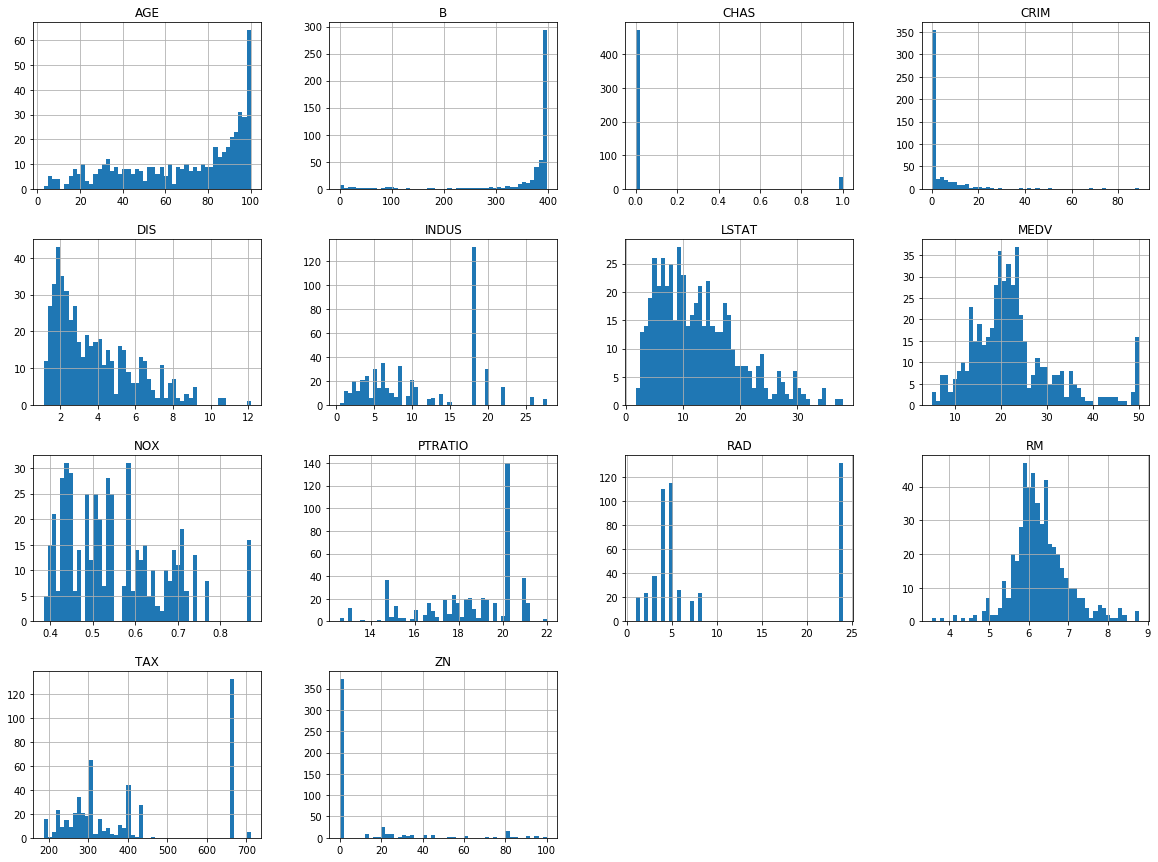

In [13]:
boston.hist(bins=50, figsize=(20,15))
plt.show()

Plot the house prices to show distribution of prices

<function matplotlib.pyplot.show(*args, **kw)>

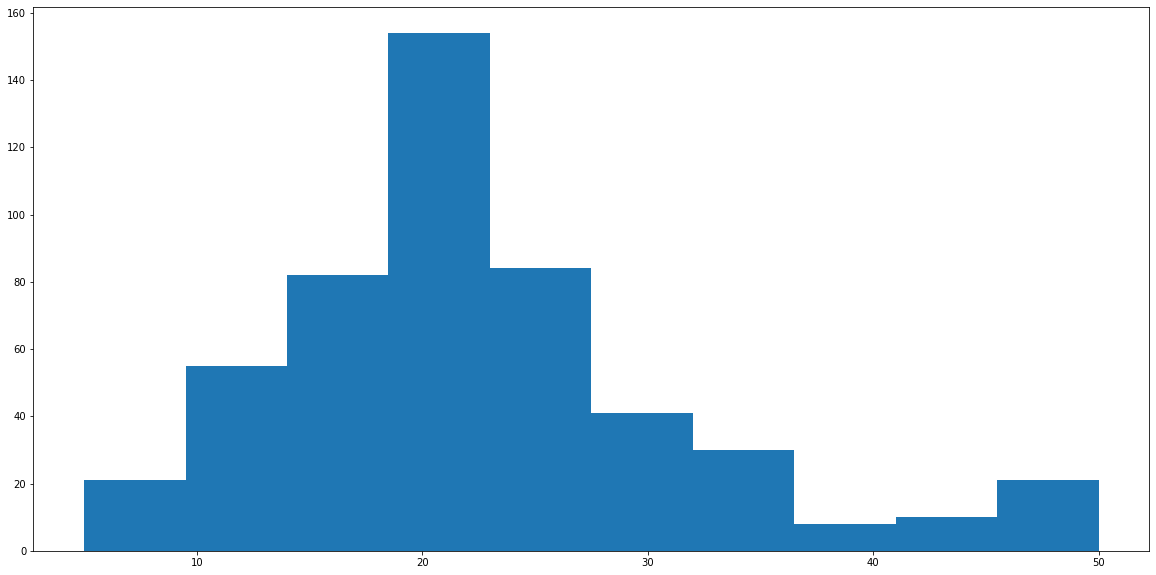

In [14]:
# Histogram of house prices in 1000's
plt.hist(boston.MEDV)
plt.show

### Distribution plot of house prices

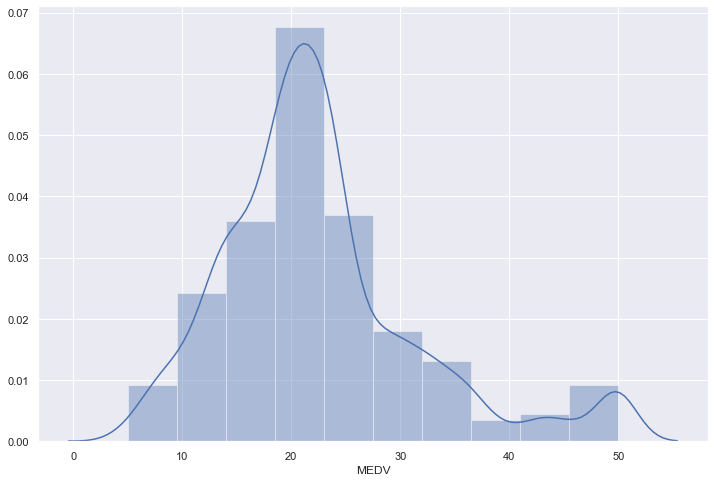

In [15]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston['MEDV'], bins=10)
plt.show()

## Correlation Heatmap
Heatmap showing the correlation matrix meausing the linear relationships between the variables of the dataset

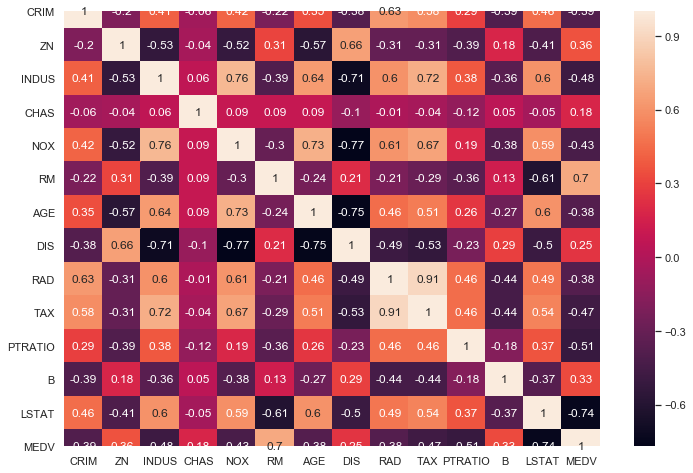

In [16]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Observations
The correlation coefficient runs on a scale of -1 to 1, 1 having stong correlation and -1 showing no correlation. MEDV shows a strong cprrelation to the RM value indicating a higher house price for a dwelling with a larger number of rooms. 

It shows negative correlation to LSTAT, lower status withing the population.

## Linear Regression

### LSAT - Percentage of lower status of the population

LSAT was selected for the linear regression module as it showed the stongest negative correlation with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. It shows that the house prices are negatively correlated linearly with the status within the population.

More "lower class" areas have lower prices.

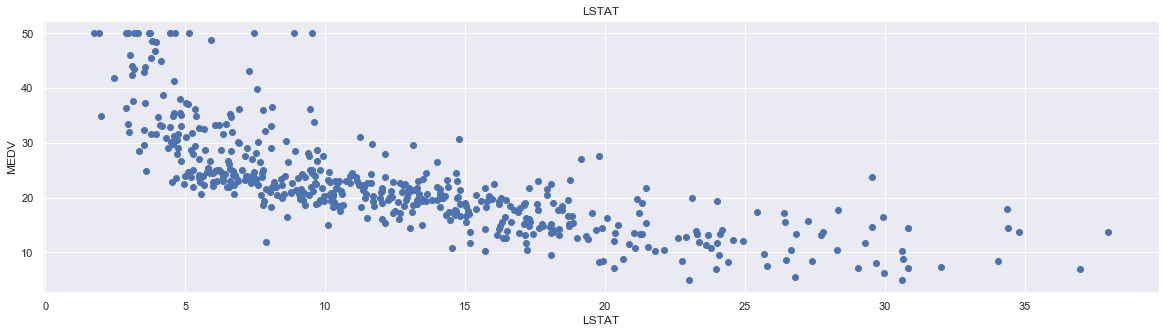

In [17]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Positive Correlation


### RM - Average number of rooms per dwelling

There is strong positive correlation with with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. There is a higher MEDV for a higher RM as more rooms would imply more space, thereby costing more, taking all other factors constant.

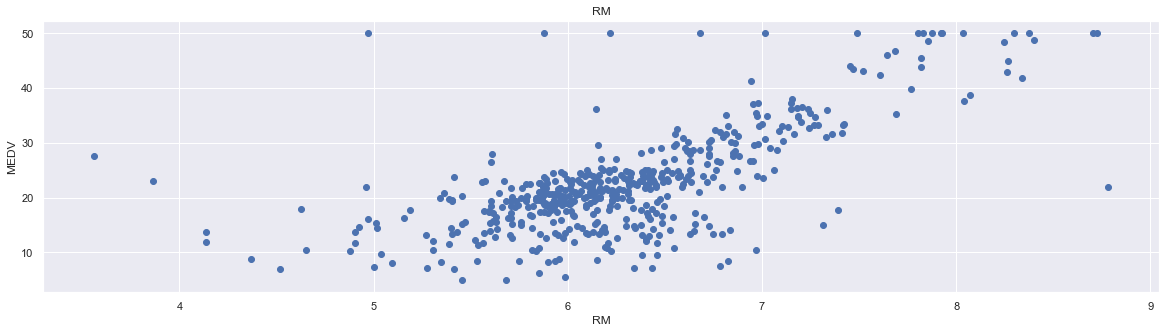

In [18]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Pupil-teacher ratio by town
There is a lower price in areas where there is a high student-to-teacher ratio due to a lower demand for houses in such areas. A high student teacher ratio results in less attention dedicated to each student and potentially impact their performance.

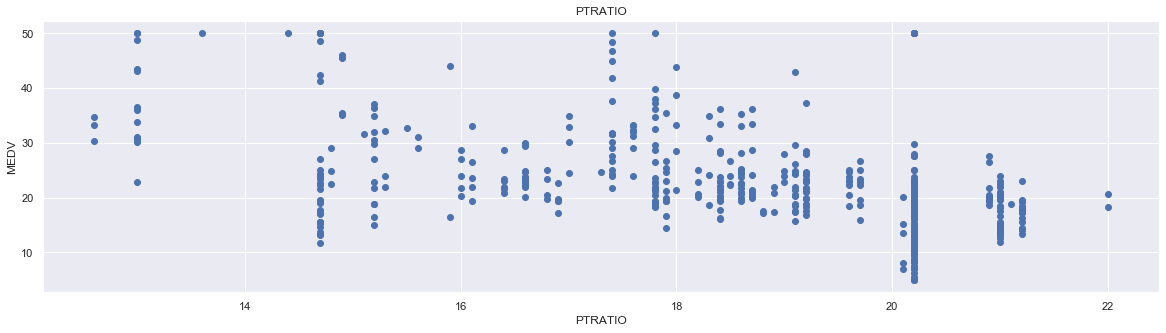

In [19]:
plt.figure(figsize=(20, 5))

features = ['PTRATIO']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

=======================================================================================================================

## Charles River Analysis

The following section uses inferential statistics are used to analyse the difference in median house prices along the Charles river and houses which are not. The following tools have been used in the analysis:
- Boxplots
- Histogram
- Anova 
- Paired T Test

The CHAS variable in the dataset is the Charles River dummy variable. The variable is equal to one is the house is bound to the Charles River and zero if it is not. This section analyzes the data based on the CHAS value and its impact on the respective MEDV value.

In [20]:
# Split the Chas data into along the river and not along the river
Along_The_River=boston.loc[boston['CHAS'] != 0]
Not_Along_The_River=boston.loc[boston['CHAS'] != 1]

In [21]:
chas = boston.CHAS
chas

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

### Histogram
Display a histogram to show how many houses in the dataset track the Charles River and how many do not.

<function matplotlib.pyplot.show(*args, **kw)>

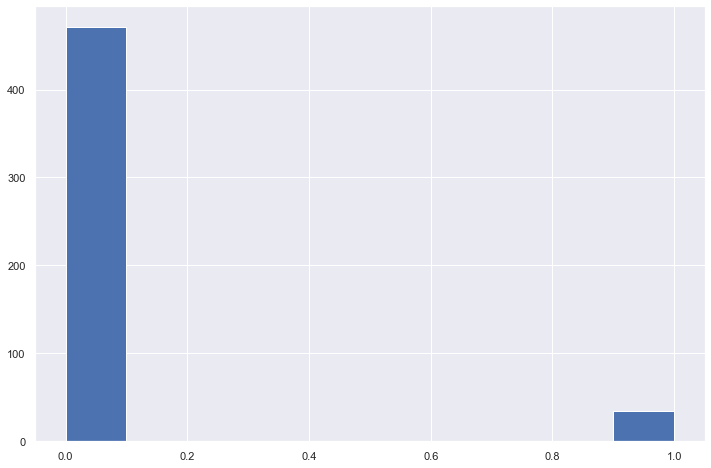

In [22]:
plt.hist(boston.CHAS)
plt.show

The histogram dispalys the number of houses houses which do not tract the river (0) and the number of house which do tract the river (1). A significantly higher number of houses do not tract the river. For futher analysis the median price for each category will be compared.

### Boxplots
Visual comparison of the median values for the houses which tract the river verus those that do not.

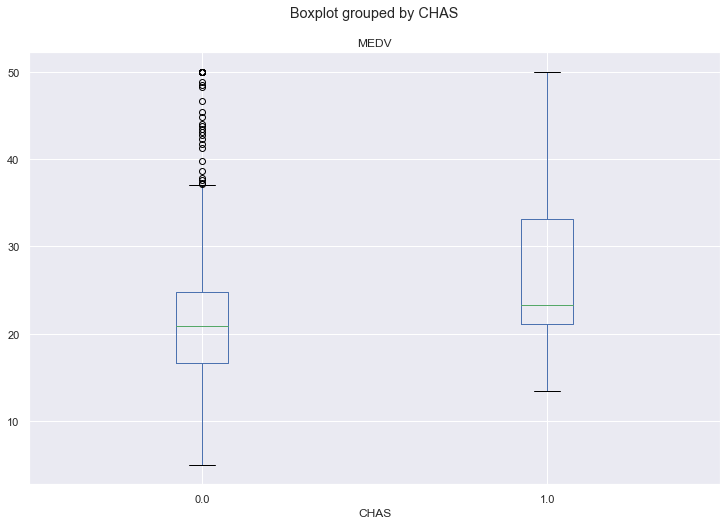

In [23]:
boston.boxplot(column='MEDV', by='CHAS')
plt.show()

The boxplot shows the median price for the houses which tract the river was higher in Boston at the time the dataset was generated.

## Anova

Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. (https://en.wikipedia.org/wiki/Analysis_of_variance)


In [24]:
atrm = np.mean(Along_The_River)                  # mean of Along_The_River
atrs = np.std(Along_The_River)                   # std of Along_The_River

natrm = np.mean(Not_Along_The_River)             # mean of Not_Along_The_River
natrs = np.std(Not_Along_The_River)              # std of Not_Along_The_River

print (atrm['MEDV'])
print (atrs['MEDV'])
print (natrs['MEDV'])
print (natrs['MEDV'])

28.44
11.64661078842866
8.821982308779564
8.821982308779564


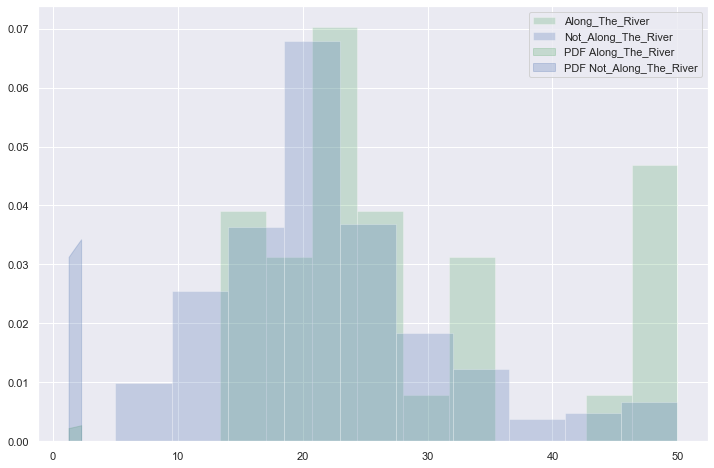

In [25]:
# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = stats.norm.pdf(x, atrm['MEDV'], atrs['MEDV'])
pdfB = stats.norm.pdf(x, natrs['MEDV'], natrs['MEDV'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="PDF Along_The_River") # Fill the area between two horizontal curves.
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="PDF Not_Along_The_River") # Fill the area between two horizontal curves.

# Plot histograms of the two samples.
plt.hist(Along_The_River['MEDV'], density=True, color='g', alpha=0.25, label="Along_The_River")
plt.hist(Not_Along_The_River['MEDV'], density=True, color='b', alpha=0.25, label="Not_Along_The_River")

# Display a legend.
plt.legend()
plt.show()

The probability density function (PDF) is calculated to find probabilities associated with a continuous random variable. Therefore it is not an analytical tool which can be applied to the Charles River Data.

### Paired T Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

When performing an independent sample t-test we assume that there is a given difference between the means of two populations, usually a difference of zero.

The t-statistic looks at the two samples to see how different they are. The hypothesised difference (usually zero) is a indication of the probability of seeing a t-statistic at least this extreme.

If the t-statistic is too extreme then we cannot accept the null hypothesis. If there is a large p-value, (> 0.05 or 0.1), then we accept the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

![Null](NullHypothesis.png)


T Test of median prices along the river and those that are not along the river: 

In [26]:
import scipy.stats as ss
ss.ttest_ind(Along_The_River['MEDV'], Not_Along_The_River['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

As the p value is 0.0000739 the null hypothesis is rejected. 

T test of median prices and if they bound the Charles River

In [27]:
ss.ttest_ind(boston['MEDV'], boston['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Houses along the Charles River have a higher median price than those that are not along the river.

=================================================================================================================

## Neural Network

![neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/220px-Kernel_Machine.svg.png)

## Train the dataset

Training Dataset: The sample of data used to fit the model.
The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data. (https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

In [28]:
from sklearn.linear_model import LinearRegression # used to train the model on both the training and test sets.

Prepare the data for training the model

In [29]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Split the data into training and testing sets. 80% of the samples are used to train the model and the remaining 20% are used to test 

In [30]:
from sklearn.model_selection import train_test_split # used to split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Scikit-learn’s LinearRegression is used to train the model on both the training and test sets.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation

The model is evaluated using RMSE and R2-score.

In [32]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


### Scatter plot 

Scatter plot to visualize the difference between actual vs predicted valuesusing the X_test values

Text(0.5, 1.0, 'Actual price vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

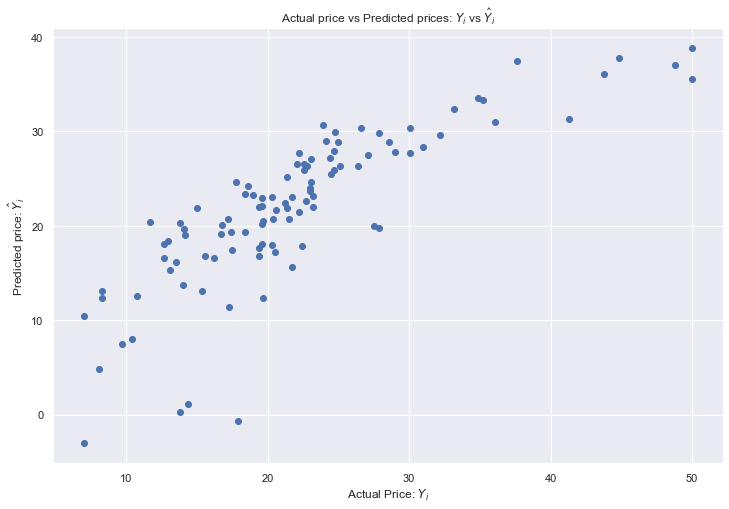

In [33]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted price: $\hat{Y}_i$")
plt.title("Actual price vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

![Keras](https://miro.medium.com/max/1000/1*LkKz4wtZNBo5i-Vc8DWhTA.png)

Create a neural network to predict the median house price based on the other variables in the dataset.

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. 

![NeuralNetwork](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/280px-Colored_neural_network.svg.png)

An artificial neural network is an interconnected group of nodes, inspired by a simplification of neurons in a brain. Here, each circular node represents an artificial neuron and an arrow represents a connection from the output of one artificial neuron to the input of another.(https://en.wikipedia.org/wiki/Artificial_neural_network)

In [34]:
# Inputs from the dataset
inputs = pd.DataFrame(boston, columns=['RM','LSTAT','PTRATIO'])

In [35]:
inputs

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. (https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/)

In [36]:
# https://scikit-learn.org/stable/modules/preprocessing.html preprocessing
xscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
xscale

,RM,LSTAT,PTRATIO
0,0.413672,-1.075562,-1.459000
1,0.194274,-0.492439,-0.303094
2,1.282714,-1.208727,-0.303094
3,1.016303,-1.361517,0.113032
4,1.228577,-1.026501,0.113032
...,...,...,...
501,0.439316,-0.418147,1.176466
502,-0.234548,-0.500850,1.176466
503,0.984960,-0.983048,1.176466
504,0.725672,-0.865302,1.176466


In [37]:
output = boston['MEDV'] #seek to output a house price value
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Build The Model
Using keras to create a neural network that can predict the median house price based on the other variables in the dataset.
To build the model I will use the following subset of the dataset:
        - RM       average number of rooms per dwelling
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras as kr

In [39]:
# Create a new neural network.
m = kr.models.Sequential()

In [40]:
# Add neurons.
# m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add a hidden layer with x neurons and an input layer with 3.
m.add(kr.layers.Dense(units=10, input_dim=3, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

In [41]:
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. (https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)

### Split

In [42]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, output_train, output_test = mod.train_test_split(inputs, output, test_size=0.2)

In [43]:
inputs_test.iloc[0]

RM          6.096
LSTAT      10.260
PTRATIO    21.000
Name: 14, dtype: float64

In [44]:
m.predict(inputs_test.as_matrix()[0:1])

C:\Users\Frank\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[-14.777388]], dtype=float32)

### Train

In [45]:
# Train the neural network.
m.fit(inputs_train, output_train, epochs=500, batch_size=20)

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 1s 4ms/sample - loss: 1295.2624
Epoch 2/500
404/404 [==============================] - 0s 208us/sample - loss: 736.2269
Epoch 3/500
404/404 [==============================] - 0s 204us/sample - loss: 414.2083
Epoch 4/500
404/404 [==============================] - 0s 217us/sample - loss: 235.0861
Epoch 5/500
404/404 [==============================] - 0s 213us/sample - loss: 147.7065
Epoch 6/500
404/404 [==============================] - 0s 220us/sample - loss: 112.9773
Epoch 7/500
404/404 [==============================] - 0s 222us/sample - loss: 100.5434
Epoch 8/500
404/404 [==============================] - 0s 220us/sample - loss: 93.5332
Epoch 9/500
404/404 [==============================] - 0s 210us/sample - loss: 88.5497
Epoch 10/500
404/404 [==============================] - 0s 222us/sample - loss: 84.0834
Epoch 11/500
404/404 [==============================] - 0s 217us/sample - loss: 79.9740
Epoch 12/500
4

404/404 [==============================] - 0s 262us/sample - loss: 34.1178
Epoch 92/500
404/404 [==============================] - 0s 250us/sample - loss: 33.8287
Epoch 93/500
404/404 [==============================] - 0s 225us/sample - loss: 33.6691
Epoch 94/500
404/404 [==============================] - 0s 220us/sample - loss: 33.5253
Epoch 95/500
404/404 [==============================] - 0s 213us/sample - loss: 33.2317
Epoch 96/500
404/404 [==============================] - 0s 217us/sample - loss: 33.1367
Epoch 97/500
404/404 [==============================] - 0s 242us/sample - loss: 33.2371
Epoch 98/500
404/404 [==============================] - 0s 230us/sample - loss: 32.5187
Epoch 99/500
404/404 [==============================] - 0s 215us/sample - loss: 32.8461
Epoch 100/500
404/404 [==============================] - 0s 245us/sample - loss: 32.2520
Epoch 101/500
404/404 [==============================] - 0s 208us/sample - loss: 32.2837
Epoch 102/500
404/404 [====================

404/404 [==============================] - 0s 264us/sample - loss: 30.7697
Epoch 184/500
404/404 [==============================] - 0s 250us/sample - loss: 30.4192
Epoch 185/500
404/404 [==============================] - 0s 277us/sample - loss: 30.5401 - loss: 32.13
Epoch 186/500
404/404 [==============================] - 0s 225us/sample - loss: 31.1621
Epoch 187/500
404/404 [==============================] - 0s 257us/sample - loss: 30.3839
Epoch 188/500
404/404 [==============================] - 0s 237us/sample - loss: 30.3273
Epoch 189/500
404/404 [==============================] - 0s 255us/sample - loss: 30.7882 - loss: 35.05
Epoch 190/500
404/404 [==============================] - 0s 264us/sample - loss: 31.1583
Epoch 191/500
404/404 [==============================] - 0s 235us/sample - loss: 30.4968
Epoch 192/500
404/404 [==============================] - 0s 304us/sample - loss: 30.9803
Epoch 193/500
404/404 [==============================] - 0s 235us/sample - loss: 31.6220
Epoch 1

404/404 [==============================] - 0s 210us/sample - loss: 31.2424
Epoch 274/500
404/404 [==============================] - 0s 220us/sample - loss: 31.5534
Epoch 275/500
404/404 [==============================] - 0s 215us/sample - loss: 30.5936
Epoch 276/500
404/404 [==============================] - 0s 213us/sample - loss: 30.4705
Epoch 277/500
404/404 [==============================] - 0s 222us/sample - loss: 30.3746
Epoch 278/500
404/404 [==============================] - 0s 208us/sample - loss: 30.4281
Epoch 279/500
404/404 [==============================] - 0s 222us/sample - loss: 30.8599
Epoch 280/500
404/404 [==============================] - 0s 215us/sample - loss: 31.0105
Epoch 281/500
404/404 [==============================] - 0s 200us/sample - loss: 30.4014
Epoch 282/500
404/404 [==============================] - 0s 210us/sample - loss: 30.4136
Epoch 283/500
404/404 [==============================] - 0s 210us/sample - loss: 30.2769
Epoch 284/500
404/404 [============

404/404 [==============================] - 0s 208us/sample - loss: 30.6117
Epoch 365/500
404/404 [==============================] - 0s 215us/sample - loss: 30.4915
Epoch 366/500
404/404 [==============================] - 0s 247us/sample - loss: 30.4169
Epoch 367/500
404/404 [==============================] - 0s 208us/sample - loss: 30.5008
Epoch 368/500
404/404 [==============================] - 0s 215us/sample - loss: 31.6014
Epoch 369/500
404/404 [==============================] - 0s 279us/sample - loss: 30.5928
Epoch 370/500
404/404 [==============================] - 0s 247us/sample - loss: 30.3511
Epoch 371/500
404/404 [==============================] - 0s 240us/sample - loss: 30.6960
Epoch 372/500
404/404 [==============================] - 0s 213us/sample - loss: 31.2324
Epoch 373/500
404/404 [==============================] - 0s 267us/sample - loss: 31.0036
Epoch 374/500
404/404 [==============================] - 0s 287us/sample - loss: 30.8282
Epoch 375/500
404/404 [============

Epoch 456/500
404/404 [==============================] - 0s 319us/sample - loss: 30.1062
Epoch 457/500
404/404 [==============================] - 0s 297us/sample - loss: 30.6887
Epoch 458/500
404/404 [==============================] - 0s 210us/sample - loss: 30.6824
Epoch 459/500
404/404 [==============================] - 0s 289us/sample - loss: 30.2655
Epoch 460/500
404/404 [==============================] - 0s 267us/sample - loss: 30.3698
Epoch 461/500
404/404 [==============================] - 0s 232us/sample - loss: 30.3289
Epoch 462/500
404/404 [==============================] - 0s 311us/sample - loss: 30.3776
Epoch 463/500
404/404 [==============================] - 0s 213us/sample - loss: 30.2613
Epoch 464/500
404/404 [==============================] - 0s 245us/sample - loss: 30.1666
Epoch 465/500
404/404 [==============================] - 0s 215us/sample - loss: 30.1403
Epoch 466/500
404/404 [==============================] - 0s 240us/sample - loss: 30.2182
Epoch 467/500
404/404

In [46]:
# Train the model.
# m.fit(inputs, output, epochs=15, batch_size=128)
# https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

### Predict

In [47]:
p = m.predict(inputs_test.as_matrix())
p

C:\Users\Frank\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[20.27177  ],
       [10.195091 ],
       [17.905174 ],
       [11.416878 ],
       [29.94     ],
       [18.336172 ],
       [27.616062 ],
       [14.807338 ],
       [21.37572  ],
       [37.8575   ],
       [25.957636 ],
       [24.270388 ],
       [32.956036 ],
       [14.619623 ],
       [16.011463 ],
       [19.306807 ],
       [31.397146 ],
       [18.384766 ],
       [18.688639 ],
       [22.271463 ],
       [26.470196 ],
       [20.930979 ],
       [15.033752 ],
       [ 7.0281057],
       [11.029216 ],
       [24.976202 ],
       [28.281351 ],
       [27.15747  ],
       [35.034653 ],
       [25.94295  ],
       [ 8.275944 ],
       [16.179022 ],
       [18.391909 ],
       [30.272133 ],
       [11.713724 ],
       [24.575785 ],
       [23.602419 ],
       [21.726982 ],
       [40.05841  ],
       [27.769606 ],
       [34.33717  ],
       [22.0101   ],
       [ 9.645014 ],
       [18.162453 ],
       [16.180506 ],
       [19.065403 ],
       [25.686594 ],
       [26.18

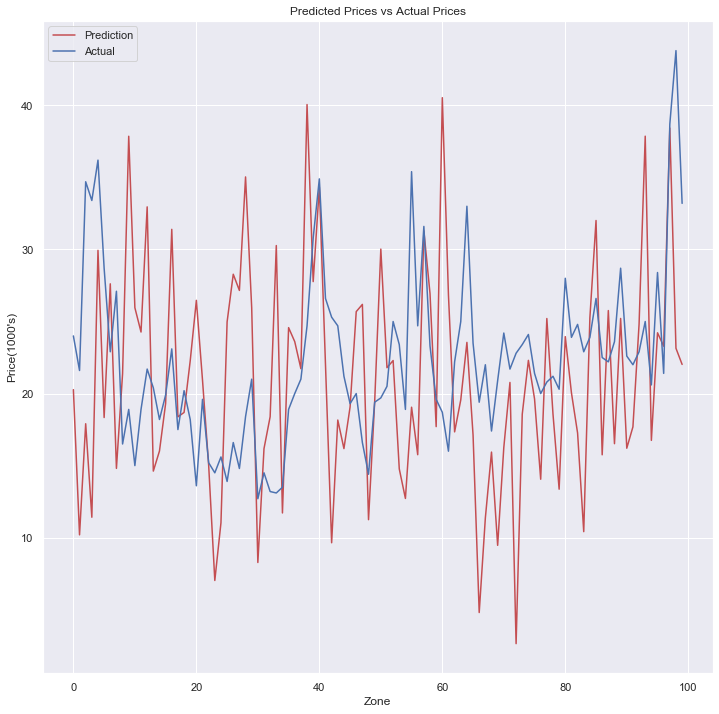

In [48]:
#Plot of actual v predicted price of first 100 data points
plt.figure(figsize=(12, 12))
plt.plot(p[:100], 'r-', label ='Predicted MEDV')
plt.plot(output[:100], 'b', label = 'Actual MEDV')
plt.title("Predicted Prices vs Actual Prices")
plt.ylabel("Price(1000's)")
plt.xlabel("Zone")
plt.legend(["Prediction", "Actual"], loc="upper left")
plt.show()

## Preprocessing the Data
Put data into format for data analysis help the nural network make better predictions. Principal Components Analysis (PCA) is a dimensionality reduction algorithm that can be used to significantly speed up your unsupervised feature learning algorithm. More importantly, understanding PCA will enable us to later implement whitening, which is an important pre-processing step for many algorithms.(http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/).

### Whitening
Whitening of data is a way to preprocess the data. The idea behind whitening is to remove the underlying correlation in the data. It is a process done usually after the data is projected onto the eigen vectors as a result of PCA.(https://www.quora.com/What-is-whitening-of-data-in-Neural-Networks)

In [55]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
xscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
xscale

,RM,LSTAT,PTRATIO
0,0.413672,-1.075562,-1.459000
1,0.194274,-0.492439,-0.303094
2,1.282714,-1.208727,-0.303094
3,1.016303,-1.361517,0.113032
4,1.228577,-1.026501,0.113032
...,...,...,...
501,0.439316,-0.418147,1.176466
502,-0.234548,-0.500850,1.176466
503,0.984960,-0.983048,1.176466
504,0.725672,-0.865302,1.176466


In [56]:
scaler = pre.StandardScaler()
scaler.fit(inputs)
scaler.mean_, scaler.scale_

(array([ 6.28463439, 12.65306324, 18.4555336 ]),
 array([0.70192251, 7.13400164, 2.16280519]))

In [57]:
xscale = pd.DataFrame(scaler.transform(inputs), columns=inputs.columns)
xscale

,RM,LSTAT,PTRATIO
0,0.413672,-1.075562,-1.459000
1,0.194274,-0.492439,-0.303094
2,1.282714,-1.208727,-0.303094
3,1.016303,-1.361517,0.113032
4,1.228577,-1.026501,0.113032
...,...,...,...
501,0.439316,-0.418147,1.176466
502,-0.234548,-0.500850,1.176466
503,0.984960,-0.983048,1.176466
504,0.725672,-0.865302,1.176466


In [58]:
inputs.corr()

,RM,LSTAT,PTRATIO
RM,1.000000,-0.613808,-0.355501
LSTAT,-0.613808,1.000000,0.374044
PTRATIO,-0.355501,0.374044,1.000000


In [64]:
pca = dec.PCA(n_components=3, whiten=True)
pca.fit(inputs)
inputs_white = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
inputs_white

,RM,LSTAT,PTRATIO
0,0.174787,-1.111098,1.204470
1,0.123639,-0.495368,0.153925
2,-0.626202,-1.204522,-0.403993
3,-0.117307,-1.337597,-0.786326
4,-0.652436,-1.010180,-0.797264
...,...,...,...
501,-0.037015,-0.369717,-1.527544
502,0.858260,-0.446872,-1.290610
503,-0.244307,-0.927144,-1.849666
504,-0.022353,-0.810096,-1.727663


In [65]:
inputs_white.corr().round()

,RM,LSTAT,PTRATIO
RM,1.0,0.0,0.0
LSTAT,0.0,1.0,0.0
PTRATIO,0.0,0.0,1.0


In [66]:
inputs_white.mean().round()

RM         0.0
LSTAT     -0.0
PTRATIO   -0.0
dtype: float64

In [67]:
inputs_white.std().round()

RM         1.0
LSTAT      1.0
PTRATIO    1.0
dtype: float64

In [68]:
# Add neurons.
# m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add a hidden layer with x neurons and an input layer with 3.
m.add(kr.layers.Dense(units=10, input_dim=3, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [75]:
# Train the neural network.
m.fit(inputs_train_white, output_train, epochs=500, batch_size=20)

Train on 404 samples
Epoch 1/500
404/404 [==============================] - 2s 5ms/sample - loss: 666.8316
Epoch 2/500
404/404 [==============================] - 0s 262us/sample - loss: 578.4697
Epoch 3/500
404/404 [==============================] - 0s 264us/sample - loss: 512.5493
Epoch 4/500
404/404 [==============================] - 0s 257us/sample - loss: 440.8271
Epoch 5/500
404/404 [==============================] - 0s 247us/sample - loss: 369.8859
Epoch 6/500
404/404 [==============================] - 0s 269us/sample - loss: 318.6583
Epoch 7/500
404/404 [==============================] - 0s 255us/sample - loss: 277.5839
Epoch 8/500
404/404 [==============================] - 0s 264us/sample - loss: 242.8679
Epoch 9/500
404/404 [==============================] - 0s 267us/sample - loss: 211.5144
Epoch 10/500
404/404 [==============================] - 0s 262us/sample - loss: 181.1654
Epoch 11/500
404/404 [==============================] - 0s 267us/sample - loss: 155.0324
Epoch 12/50

404/404 [==============================] - 0s 264us/sample - loss: 29.2939
Epoch 92/500
404/404 [==============================] - 0s 267us/sample - loss: 29.5625
Epoch 93/500
404/404 [==============================] - 0s 262us/sample - loss: 29.3092
Epoch 94/500
404/404 [==============================] - 0s 232us/sample - loss: 29.2562
Epoch 95/500
404/404 [==============================] - 0s 257us/sample - loss: 29.5433
Epoch 96/500
404/404 [==============================] - 0s 252us/sample - loss: 29.7665
Epoch 97/500
404/404 [==============================] - 0s 245us/sample - loss: 29.6613
Epoch 98/500
404/404 [==============================] - 0s 237us/sample - loss: 29.5596
Epoch 99/500
404/404 [==============================] - 0s 257us/sample - loss: 29.4131
Epoch 100/500
404/404 [==============================] - 0s 272us/sample - loss: 29.4740
Epoch 101/500
404/404 [==============================] - 0s 267us/sample - loss: 29.3516
Epoch 102/500
404/404 [====================

404/404 [==============================] - 0s 255us/sample - loss: 29.4151
Epoch 183/500
404/404 [==============================] - 0s 269us/sample - loss: 29.4276
Epoch 184/500
404/404 [==============================] - 0s 264us/sample - loss: 29.4049
Epoch 185/500
404/404 [==============================] - 0s 257us/sample - loss: 29.5896
Epoch 186/500
404/404 [==============================] - 0s 252us/sample - loss: 29.7394
Epoch 187/500
404/404 [==============================] - 0s 267us/sample - loss: 29.5195
Epoch 188/500
404/404 [==============================] - 0s 247us/sample - loss: 29.6628
Epoch 189/500
404/404 [==============================] - 0s 255us/sample - loss: 29.3703
Epoch 190/500
404/404 [==============================] - 0s 255us/sample - loss: 29.5218
Epoch 191/500
404/404 [==============================] - 0s 240us/sample - loss: 29.5449
Epoch 192/500
404/404 [==============================] - 0s 247us/sample - loss: 29.8768
Epoch 193/500
404/404 [============

404/404 [==============================] - 0s 200us/sample - loss: 29.4735
Epoch 274/500
404/404 [==============================] - 0s 205us/sample - loss: 29.6236
Epoch 275/500
404/404 [==============================] - 0s 200us/sample - loss: 29.8061
Epoch 276/500
404/404 [==============================] - 0s 205us/sample - loss: 29.3509
Epoch 277/500
404/404 [==============================] - 0s 198us/sample - loss: 29.3815
Epoch 278/500
404/404 [==============================] - 0s 203us/sample - loss: 29.4632
Epoch 279/500
404/404 [==============================] - 0s 240us/sample - loss: 29.4145
Epoch 280/500
404/404 [==============================] - 0s 334us/sample - loss: 29.6006
Epoch 281/500
404/404 [==============================] - 0s 245us/sample - loss: 29.5490
Epoch 282/500
404/404 [==============================] - 0s 222us/sample - loss: 29.5994
Epoch 283/500
404/404 [==============================] - 0s 227us/sample - loss: 29.3971
Epoch 284/500
404/404 [============

404/404 [==============================] - 0s 213us/sample - loss: 29.3408
Epoch 365/500
404/404 [==============================] - 0s 205us/sample - loss: 29.3966
Epoch 366/500
404/404 [==============================] - 0s 213us/sample - loss: 29.3110
Epoch 367/500
404/404 [==============================] - 0s 215us/sample - loss: 29.4474
Epoch 368/500
404/404 [==============================] - 0s 213us/sample - loss: 29.6370
Epoch 369/500
404/404 [==============================] - 0s 208us/sample - loss: 29.8833
Epoch 370/500
404/404 [==============================] - 0s 217us/sample - loss: 29.7307
Epoch 371/500
404/404 [==============================] - 0s 203us/sample - loss: 29.3573
Epoch 372/500
404/404 [==============================] - 0s 210us/sample - loss: 29.4007
Epoch 373/500
404/404 [==============================] - 0s 203us/sample - loss: 29.2330
Epoch 374/500
404/404 [==============================] - 0s 208us/sample - loss: 29.4963
Epoch 375/500
404/404 [============

404/404 [==============================] - 0s 203us/sample - loss: 29.6304
Epoch 457/500
404/404 [==============================] - 0s 203us/sample - loss: 29.6069
Epoch 458/500
404/404 [==============================] - 0s 203us/sample - loss: 29.5200
Epoch 459/500
404/404 [==============================] - 0s 203us/sample - loss: 29.3793
Epoch 460/500
404/404 [==============================] - 0s 205us/sample - loss: 29.7042
Epoch 461/500
404/404 [==============================] - 0s 210us/sample - loss: 29.4807
Epoch 462/500
404/404 [==============================] - 0s 205us/sample - loss: 29.5043
Epoch 463/500
404/404 [==============================] - 0s 205us/sample - loss: 29.7396
Epoch 464/500
404/404 [==============================] - 0s 208us/sample - loss: 29.6990
Epoch 465/500
404/404 [==============================] - 0s 215us/sample - loss: 29.3363
Epoch 466/500
404/404 [==============================] - 0s 200us/sample - loss: 29.2664
Epoch 467/500
404/404 [============

In [79]:
w = m.predict(inputs_white.as_matrix())
w

C:\Users\Frank\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 16.470911 ],
       [ 20.296219 ],
       [ 25.227022 ],
       [ 22.281744 ],
       [ 26.635601 ],
       [ 17.08431  ],
       [ 16.460503 ],
       [ 25.296255 ],
       [ 28.978132 ],
       [ 21.033049 ],
       [ 29.294897 ],
       [ 17.26244  ],
       [ 18.128078 ],
       [ 15.361836 ],
       [ 19.298738 ],
       [ 14.05953  ],
       [ 13.494891 ],
       [ 22.321802 ],
       [ 12.31285  ],
       [ 15.466777 ],
       [ 23.157879 ],
       [ 21.151566 ],
       [ 28.377878 ],
       [ 25.212292 ],
       [ 23.08638  ],
       [ 19.021828 ],
       [ 20.133856 ],
       [ 25.685896 ],
       [ 27.09123  ],
       [ 28.62435  ],
       [ 26.621468 ],
       [ 21.76768  ],
       [ 34.857365 ],
       [ 22.206554 ],
       [ 29.395515 ],
       [ 15.361244 ],
       [ 15.883996 ],
       [ 13.357985 ],
       [ 16.246058 ],
       [ 18.09372  ],
       [ 21.392696 ],
       [ 20.647013 ],
       [ 13.713346 ],
       [ 15.898508 ],
       [ 16.144215 ],
       [ 1

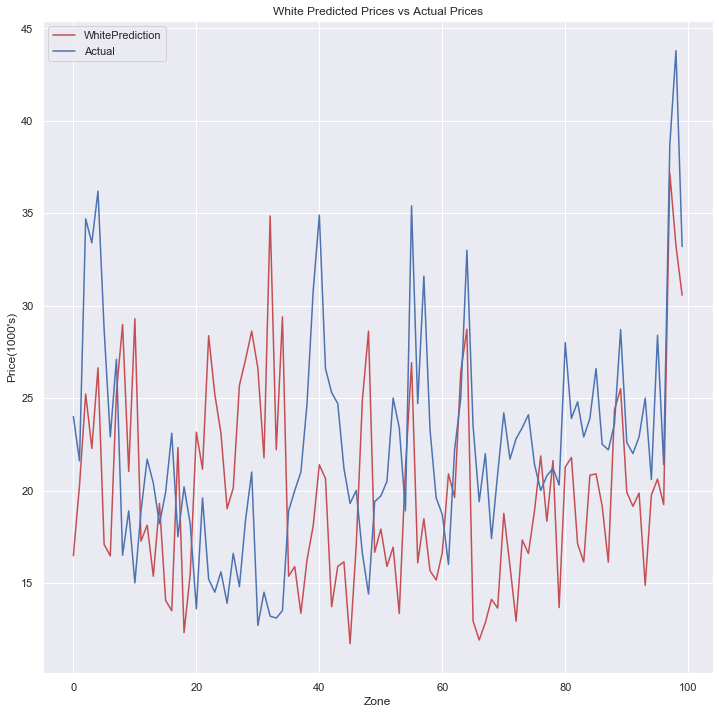

In [80]:
#Plot of actual v whitened predicted price of first 100 data points
plt.figure(figsize=(12, 12))
plt.plot(w[:100], 'r-', label ='WhitePredicted MEDV')
plt.plot(output[:100], 'b', label = 'Actual MEDV')
plt.title("White Predicted Prices vs Actual Prices")
plt.ylabel("Price(1000's)")
plt.xlabel("Zone")
plt.legend(["WhitePrediction", "Actual"], loc="upper left")
plt.show()

## Conclusion


Based on the analysis of the dataset and the training of the neural network, I do not think that the average number of rooms per dwelling (RM), pupil-teacher ratio by town (PTRATIO) and % lower status of the population (LSTAT) make decent predictions of house prices. Whitening the data appears to have given less accurate predictions of the house prices in Boston.